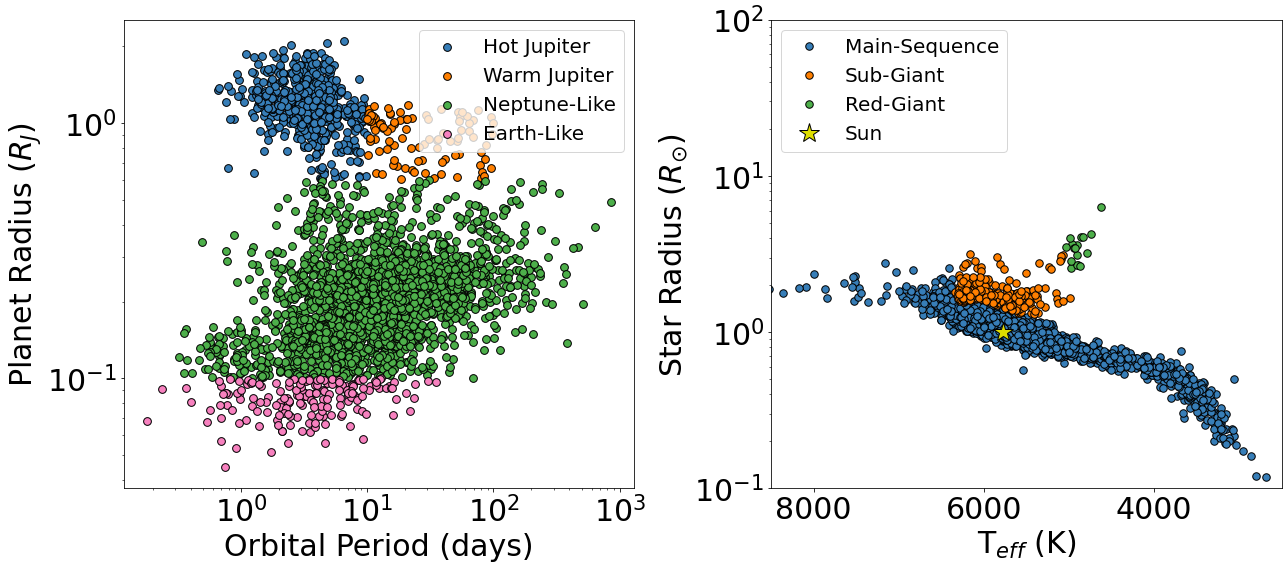

In [11]:
from matplotlib.markers import MarkerStyle
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from evolstate import *

df = pd.read_csv('New_Stellar_host_mod.csv')
grouped = df.groupby('hostname')

aggregated_df = grouped.agg({
    'pl_name': lambda x: ', '.join(x.unique()),  # Combine planet names as a comma-separated string of unique values
    'st_mass': 'mean',                      # Take the mean for stellar mass
    'st_rad': 'mean',                    # Take the mean for stellar radius
    'st_teff': 'mean',             # Use the median for temperature
    'st_logg': 'mean',
    'pl_radj': 'mean',
    'pl_orbper': 'mean'
})

# evolstate key parameters
# 0 = main sequence
# 1 = subgiant
# 2 = RGB
# 3 = main sequence binary (teff & R only)

# Reset the index to get a clean DataFrame
aggregated_df = aggregated_df.reset_index()
rad_new = aggregated_df['st_rad']
logg_new = aggregated_df['st_logg']
pl_name_new = aggregated_df['pl_name']
teff_new = aggregated_df['st_teff']
rad_pl_new = aggregated_df['pl_radj']
period_new = aggregated_df['pl_orbper']
# print(pl_name_new[np.argmax(logg_new)])
figure, axes = plt.subplots(1,2,figsize=(18,8),sharex=False,sharey=False)

#plot font
fontsize = 30
point_size = 15
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
ax = axes[0]

HJ = (rad_pl_new>0.6) & (period_new<10)
WJ = (rad_pl_new>0.6) & (period_new>=10) & (period_new<=100)
NL = (rad_pl_new >= 0.1) & (rad_pl_new < 0.6)
TL = rad_pl_new < 0.1
Other = ~(HJ|WJ)
ax.scatter(period_new[HJ],rad_pl_new[HJ],color = CB_color_cycle[0],s=60,edgecolors='k',label='Hot Jupiter')
ax.scatter(period_new[WJ],rad_pl_new[WJ],color = CB_color_cycle[1],s=60,edgecolors='k',label='Warm Jupiter')
ax.scatter(period_new[NL],rad_pl_new[NL],color = CB_color_cycle[2],s=60,edgecolors='k',label='Neptune-Like')
ax.scatter(period_new[TL],rad_pl_new[TL],color = CB_color_cycle[3],s=60,edgecolors='k',label='Earth-Like')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Orbital Period (days)', fontsize=fontsize)
ax.set_ylabel('Planet Radius ($R_J$)', fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.legend(loc='upper right',fontsize=20)

ax = axes[1]
cl = evolstate(teff_new,rad_new,-99.+np.zeros(len(teff_new)))
ax.semilogy(teff_new[cl == 0],rad_new[cl == 0],'.',
             markersize=point_size, markerfacecolor=CB_color_cycle[0], markeredgecolor='k', markeredgewidth=1,label='Main-Sequence')
ax.semilogy(teff_new[cl == 1],rad_new[cl == 1],'.',
             markersize=point_size, markerfacecolor=CB_color_cycle[1], markeredgecolor='k', markeredgewidth=1,label='Sub-Giant')

rad_RG = rad_new[cl == 2]
teff_RG = teff_new[cl == 2]

ax.semilogy(teff_RG,rad_RG,'.',
             markersize=point_size, markerfacecolor=CB_color_cycle[2], markeredgecolor='k', markeredgewidth=1,label='Red-Giant')
#KIC 9145861 paras from exoplanet
KIC_logg = 3.02
KIC_teff = 4926
KIC_rad = 5.6323  
# sun paras
Sun_logg = 4.44
Sun_teff = 5778  
Sun_rad = 1.0

ax.semilogy(Sun_teff,Sun_rad,'*',markersize=20,
             markerfacecolor=CB_color_cycle[8], markeredgecolor='k', markeredgewidth=1,label='Sun')
ax.set_xlim([8500,2500])
ax.set_ylim([0.1,100])
ax.set_ylabel(r'Star Radius ($R_{\odot}$)',fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.set_xlabel(r'T$_{eff}$ (K)', fontsize=fontsize)
_ = ax.legend(loc='upper left',fontsize=20)

plt.tight_layout()
figure.savefig('Exoplanet_Hosts.png',facecolor='w',dpi=100,bbox_inches='tight')

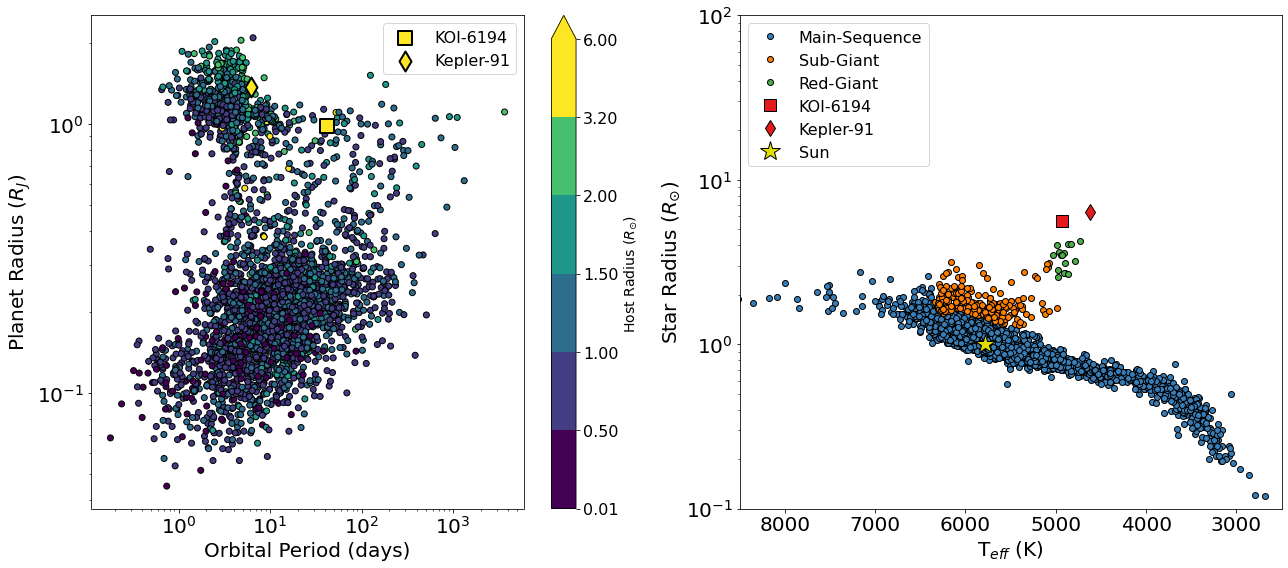

In [2]:
import matplotlib as mpl
from matplotlib import cm
import matplotlib.colors as clr
from matplotlib.colors import BoundaryNorm, ListedColormap, LogNorm, Normalize, LinearSegmentedColormap, PowerNorm
figure, axes = plt.subplots(1,2,figsize=(18,8),sharex=False,sharey=False)

# KOI-6194 parameters
KOI6194b = [9.829/10, 240.1628/317.93842034806,  0.1574, 42.2958,4725.29, 0]
KOI6194_rad = 5.632

# Kepler-91 parameters
Kepler91_rad = rad_new[np.argmax(rad_new)]
Kepler91_pl_rad = rad_pl_new[np.argmax(rad_new)]
Kepler91_per = period_new[np.argmax(rad_new)]
Kepler91_teff = teff_new[np.argmax(rad_new)]

colors = plt.get_cmap('viridis')(np.linspace(0, 1, 256))
new_colors = np.vstack((colors[:200], colors[230:]))  # Remove colors between indices that map to [3.2, 6.0]
new_cmap = ListedColormap(new_colors)
cmap = new_cmap
bounds = [0.01, 0.5, 1, 1.5, 2, 3.2, 6]
norm = BoundaryNorm(bounds, ncolors=cmap.N, clip=True)

ax = axes[0]
scatter = ax.scatter(period_new,rad_pl_new,c=rad_new,cmap=cmap,
                     norm=norm,edgecolors='k')
ax.scatter(KOI6194b[3],KOI6194b[0],c=KOI6194_rad,cmap=scatter.cmap,norm=scatter.norm,marker='s',
                            edgecolor='k',linewidth=2,s=200,label='KOI-6194')
ax.scatter(Kepler91_per,Kepler91_pl_rad,c=Kepler91_rad,cmap=scatter.cmap,norm=scatter.norm,marker='d',
                            edgecolor='k',linewidth=2,s=200,label='Kepler-91')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Orbital Period (days)', fontsize=fontsize)
ax.set_ylabel('Planet Radius ($R_J$)', fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
cbar = figure.colorbar(scatter,ax=ax,extend='max')
cbar.set_label(r'Host Radius ($R_{\odot}$)',fontsize=14)
cbar.ax.tick_params(labelsize=16)
ax.legend(loc='upper right',fontsize=16)

ax = axes[1]
cl = evolstate(teff_new,rad_new,-99.+np.zeros(len(teff_new)))
ax.semilogy(teff_new[cl == 0],rad_new[cl == 0],'.',markersize=point_size, markerfacecolor=CB_color_cycle[0],
             markeredgecolor='k', markeredgewidth=1,label='Main-Sequence')
ax.semilogy(teff_new[cl == 1],rad_new[cl == 1],'.',markersize=point_size, markerfacecolor=CB_color_cycle[1], 
             markeredgecolor='k', markeredgewidth=1,label='Sub-Giant')

rad_RG = rad_new[cl == 2]
teff_RG = teff_new[cl == 2]

ax.semilogy(teff_RG,rad_RG,'.',markersize=point_size, markerfacecolor=CB_color_cycle[2], 
            markeredgecolor='k', markeredgewidth=1,label='Red-Giant')
#KIC 9145861 paras from exoplanet
KIC_logg = 3.02
KIC_teff = 4926
KIC_rad = 5.6323  
# sun paras
Sun_logg = 4.44
Sun_teff = 5778  
Sun_rad = 1.0

ax.semilogy(KIC_teff,KIC_rad,'s',markersize=point_size, 
            markerfacecolor=CB_color_cycle[7], markeredgecolor='k', markeredgewidth=1,label='KOI-6194')
ax.semilogy(Kepler91_teff,Kepler91_rad,'d',markersize=point_size,
            markerfacecolor=CB_color_cycle[7], markeredgecolor='k', markeredgewidth=1,label='Kepler-91')

ax.semilogy(Sun_teff,Sun_rad,'*',markersize=20,
             markerfacecolor=CB_color_cycle[8], markeredgecolor='k', markeredgewidth=1,label='Sun')
ax.set_xlim([8500,2500])
ax.set_ylim([0.1,100])
ax.set_ylabel(r'Star Radius ($R_{\odot}$)',fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.set_xlabel(r'T$_{eff}$ (K)', fontsize=fontsize)
_ = ax.legend(loc='upper left',fontsize=16)

plt.tight_layout()

figure.savefig('KOI_6194_Exoplanet_Hosts.png',facecolor='w',dpi=100,bbox_inches='tight')